# Bank Marketing using Machine Learning

## Introduction

### Predict Bank Term Deposit Subscription using Machine Learning

Marketing plays a pivotal role in the success of banking institutions, as they strive to reach potential clients effectively. Banks often rely on mediums like social media, digital platforms, customer service, and strategic partnerships to engage with customers. However, targeting specific demographics, locations, or social groups accurately remains a challenge.

With the advent of machine learning, banks now have the ability to leverage data and predictive analytics to refine their marketing strategies. By analyzing customer data, they can identify patterns and make data-driven decisions about which customers are more likely to subscribe to financial products. In this project, we explore how machine learning can help a Portuguese bank prioritize potential customers for a term deposit subscription based on past marketing data.

## Data Overview

The dataset used in this project originates from the direct marketing campaigns of a Portuguese banking institution. These campaigns were conducted via phone calls, and in many cases, multiple contacts were made with each client to determine whether they would subscribe to the bank's term deposit product.

- Number of Instances: 41188
- Number of Attributes: 20 + output attribute.

### Attribute Information:

#### Input Variables:

1. Bank client data:
   - **age** (numeric)
   - **job**: type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   - **marital**: marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   - **default**: has credit in default? (categorical: "no","yes","unknown")
   - **housing**: has housing loan? (categorical: "no","yes","unknown")
   - **loan**: has personal loan? (categorical: "no","yes","unknown")
2. Related with the last contact of the current campaign:
   - **contact**: contact communication type (categorical: "cellular","telephone") 
   - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
   - **duration**: last contact duration, in seconds (numeric). <br>
                  Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). 
                  Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. 
                  Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
3. Other attributes:
   - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
   - **previous**: number of contacts performed before this campaign and for this client (numeric)
   - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
4. Social and economic context attributes:
   - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)
   - **cons.price.idx**: consumer price index - monthly indicator (numeric)
   - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)
   - **euribor3m**: euribor 3 month rate - daily indicator (numeric)
   - **nr.employed**: number of employees - quarterly indicator (numeric)

#### Output Variable (Desired Target):

- **y**: has the client subscribed to a term deposit? (binary: "yes","no")

## Goal

The classification goal is to predict if the client will subscribe a term deposit (variable y).

## Objective

In this project, we aim to build a machine learning model that can predict whether a client will subscribe to a term deposit. We will follow the steps outlined below:

1. Exploratory Data Analysis
2. Data Preprocessing & Feature Engineering
3. Model Selection: Baseline Models
4. Analyze Model Performance on Baseline Models
5. Feature Importance
6. Hyperparameter Tuning
7. Model Evaluation
8. Conclusion

## Data Preparation

In [63]:
import pandas as pd

df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep=';')
print("Number of samples: ", len(df))

Number of samples:  41188


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [65]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [66]:
# Count the number of samples in each class
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

This indicates that the dataset is imbalanced, with the majority of clients not subscribing to a term deposit. We will need to address this imbalance during data preprocessing.

In [67]:
# Convert the class labels to binary values in a new column 'Y_LABEL'
df['Y_LABEL'] = (df.y == 'yes').astype(int)

In [68]:
# Calculate the percentage of class samples
def calculate_prevalence(y):
    return sum(y) / len(y)

In [69]:
# Percentage of positive samples
print("Prevalence for class 1: ", calculate_prevalence(df['Y_LABEL']))

# Percentage of negative samples
print("Prevalence for class 0: ", 1 - calculate_prevalence(df['Y_LABEL']))

Prevalence for class 1:  0.11265417111780131
Prevalence for class 0:  0.8873458288821987


This means that the prevalence of the majority class ('NO') is 88.73%, while the prevalence of the minority class ('YES') is 11.27%.

## Exploratory Data Analysis

In [70]:
# Displaying the first 10 columns of the dataset
df[list(df.columns)[:10]].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon
1,57,services,married,high.school,unknown,no,no,telephone,may,mon
2,37,services,married,high.school,no,yes,no,telephone,may,mon
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon
4,56,services,married,high.school,no,no,yes,telephone,may,mon


In [71]:
# Displaying the last columns of the dataset
df[list(df.columns)[10:]].head()

,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Y_LABEL
0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [72]:
# Total number of columns
print("Number of columns: ", len(df.columns))

Number of columns:  22


In [73]:
# print the number of unique values in each column and if it is less than 30 print the unique values
for col in df.columns:
    print(col, df[col].nunique())
    if df[col].nunique() < 30:
        print(df[col].unique())
    print('-----------------------')

age 78
-----------------------
job 12
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
-----------------------
marital 4
['married' 'single' 'divorced' 'unknown']
-----------------------
education 8
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
-----------------------
default 3
['no' 'unknown' 'yes']
-----------------------
housing 3
['no' 'yes' 'unknown']
-----------------------
loan 3
['no' 'yes' 'unknown']
-----------------------
contact 2
['telephone' 'cellular']
-----------------------
month 10
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
-----------------------
day_of_week 5
['mon' 'tue' 'wed' 'thu' 'fri']
-----------------------
duration 1544
-----------------------
campaign 42
-----------------------
pdays 27
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18 

In [74]:
# Print the numerical and categorical columns excluding output and output label columns
num_col = df.select_dtypes(include=['int64', 'float64']).columns
cat_col = df.select_dtypes(include=['object']).columns

print("Numerical columns: ", num_col)
print("Categorical columns: ", cat_col)

Numerical columns:  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'Y_LABEL'],
      dtype='object')
Categorical columns:  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


Discarding the 'duration' column, since this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## Feature Engineering

### Numerical Features

In [75]:
num_col = num_col.drop('Y_LABEL')

print(num_col)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [76]:
# Removing the 'duration' column from the numerical columns
num_col = num_col.drop('duration')

print(num_col)

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [77]:
df[num_col].head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [78]:
df[num_col].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [79]:
# Checking missing values in the numeric columns
df[num_col].isnull().sum()

age               0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

#### Graphical Representation

Text(0.5, 1.0, 'Age Count Distribution')

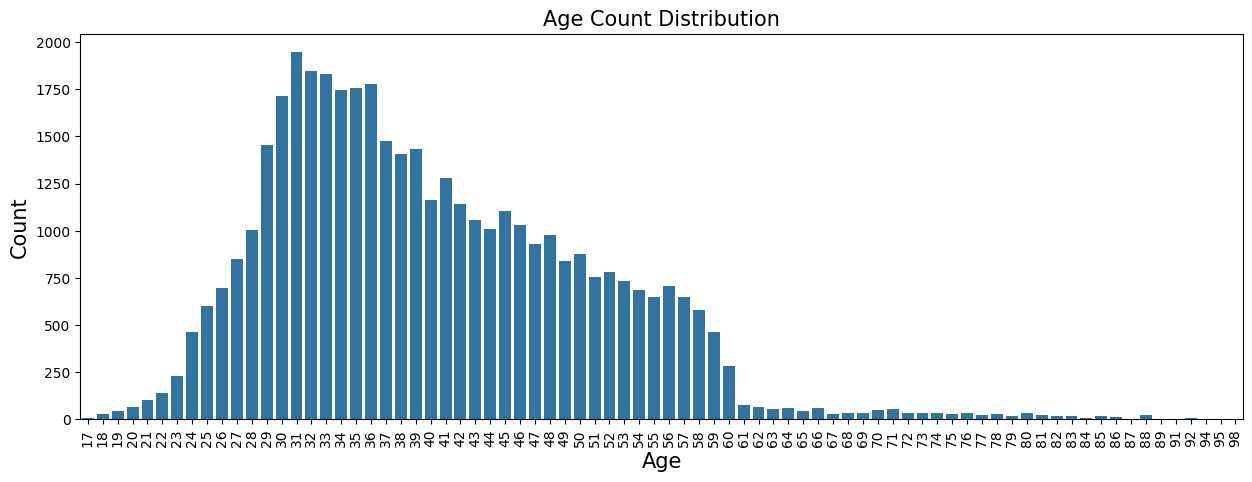

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.countplot(x = 'age', data = df)
plt.xticks(rotation=90)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Age Count Distribution', fontsize=15)

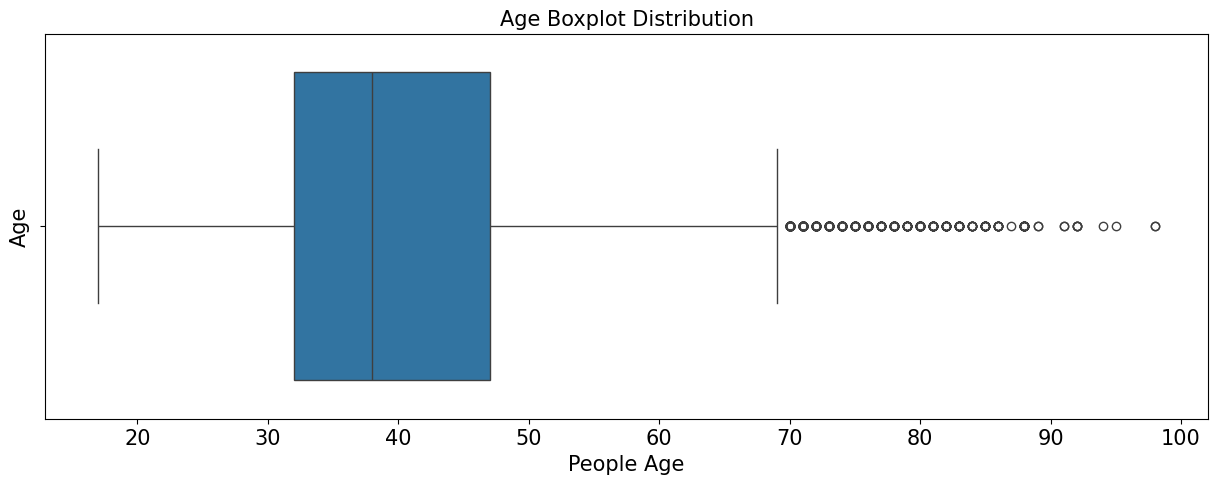

In [81]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='age', data=df[num_col])
plt.xlabel('People Age', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.title('Age Boxplot Distribution', fontsize=15)
plt.tick_params(labelsize=15)

plt.show()

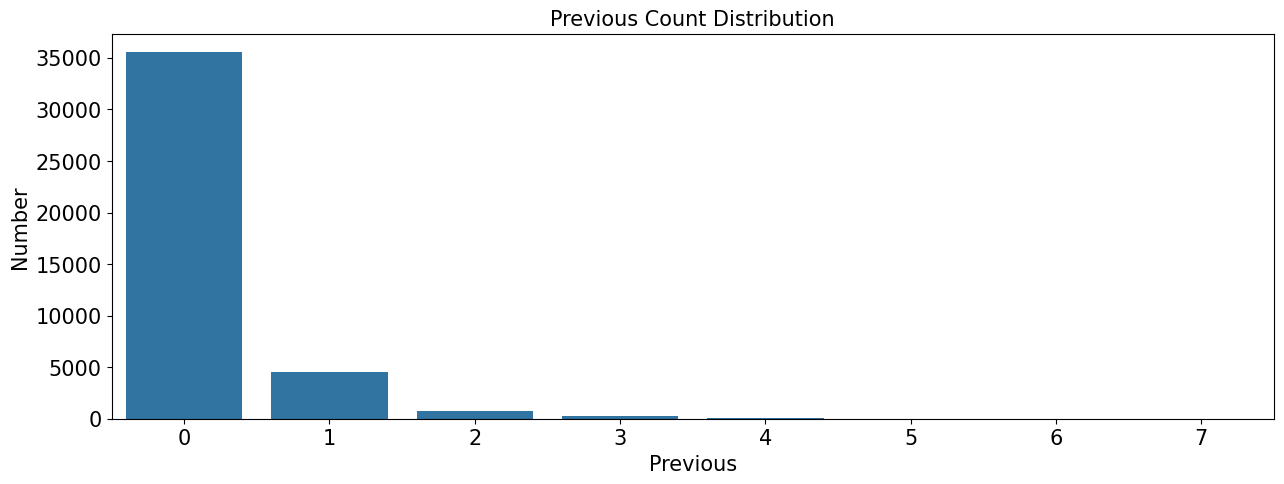

In [82]:
plt.figure(figsize=(15, 5))
sns.countplot(x='previous', data=df[num_col])
plt.xlabel('Previous', fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.title('Previous Count Distribution', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

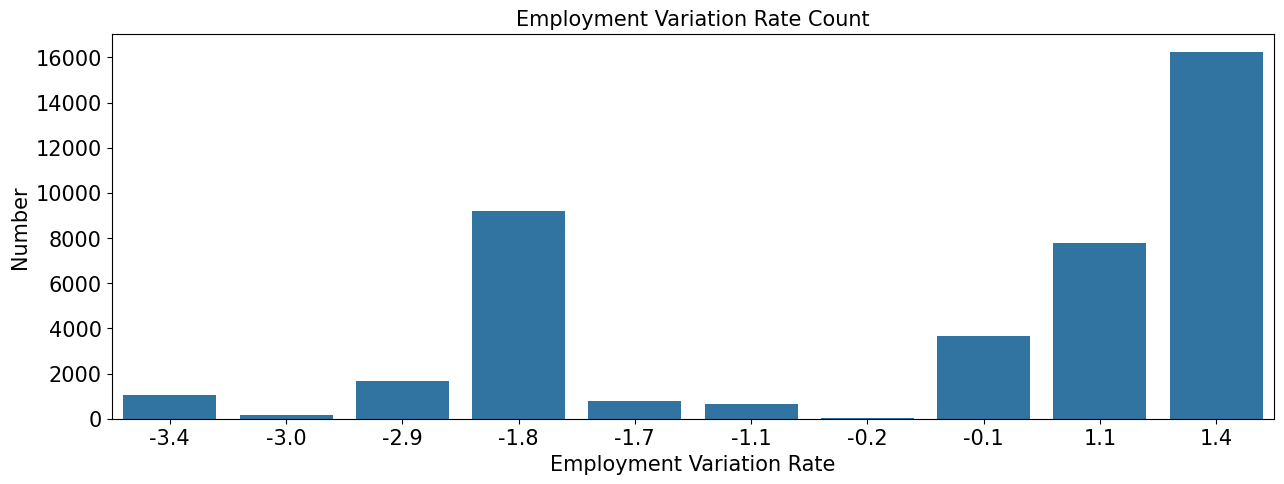

In [83]:
plt.figure(figsize=(15, 5))
sns.countplot(x='emp.var.rate', data=df[num_col])
plt.xlabel('Employment Variation Rate', fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.title('Employment Variation Rate Count', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()


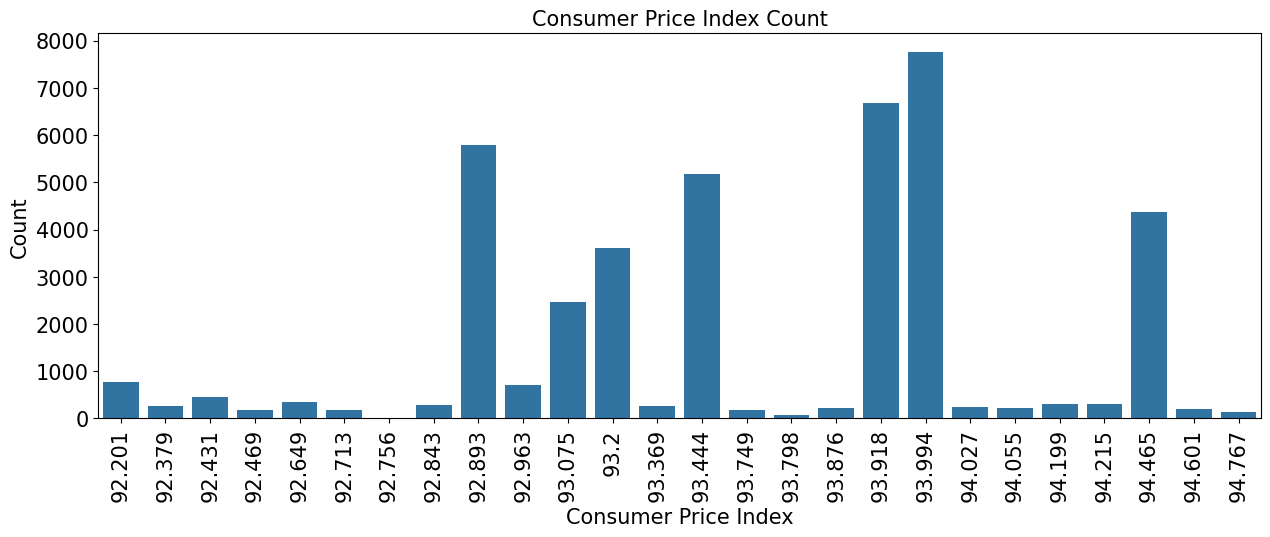

In [84]:
plt.figure(figsize=(15, 5))
sns.countplot(x='cons.price.idx', data=df[num_col])
plt.xlabel('Consumer Price Index', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Consumer Price Index Count', fontsize=15)
plt.tick_params(labelsize=15)
plt.xticks(rotation=90)
plt.show()

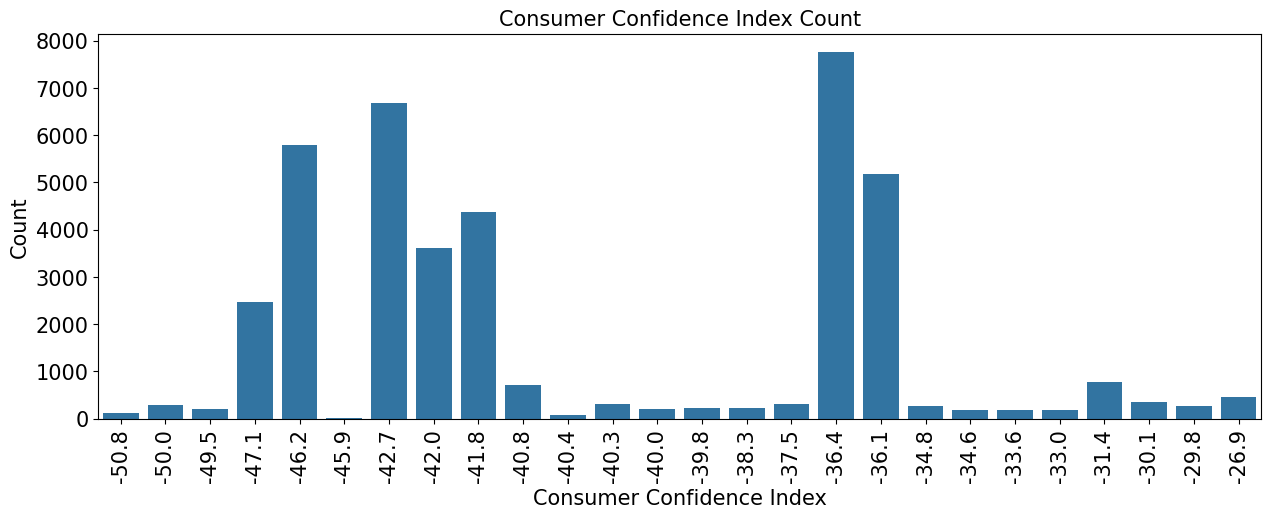

In [85]:
plt.figure(figsize=(15, 5))
sns.countplot(x='cons.conf.idx', data=df[num_col])
plt.xlabel('Consumer Confidence Index', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Consumer Confidence Index Count', fontsize=15)
plt.tick_params(labelsize=15)
plt.xticks(rotation=90)
plt.show()

### Categorical Features

In [86]:
cat_col = cat_col.drop('y')

print(cat_col)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [87]:
df[cat_col].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [88]:
# Checking missing values in the categorical columns
df[cat_col].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

In [89]:
# printing the unique values in the categorical columns
for col in cat_col:
    print('-----------------------')
    print(col, "(", len(df[col].unique()), ")", df[col].unique())    

-----------------------
job ( 12 ) ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
-----------------------
marital ( 4 ) ['married' 'single' 'divorced' 'unknown']
-----------------------
education ( 8 ) ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
-----------------------
default ( 3 ) ['no' 'unknown' 'yes']
-----------------------
housing ( 3 ) ['no' 'yes' 'unknown']
-----------------------
loan ( 3 ) ['no' 'yes' 'unknown']
-----------------------
contact ( 2 ) ['telephone' 'cellular']
-----------------------
month ( 10 ) ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
-----------------------
day_of_week ( 5 ) ['mon' 'tue' 'wed' 'thu' 'fri']
-----------------------
poutcome ( 3 ) ['nonexistent' 'failure' 'success']


#### Encoding Categorical Features

We have used the One-Hot Encoding technique to encode the categorical features. This technique creates a binary column for each category and returns a matrix with a binary column for each category.

In [90]:
new_cat_col = pd.get_dummies(df[cat_col], drop_first=False).astype(int)
new_cat_col.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


#### Graphical Representation

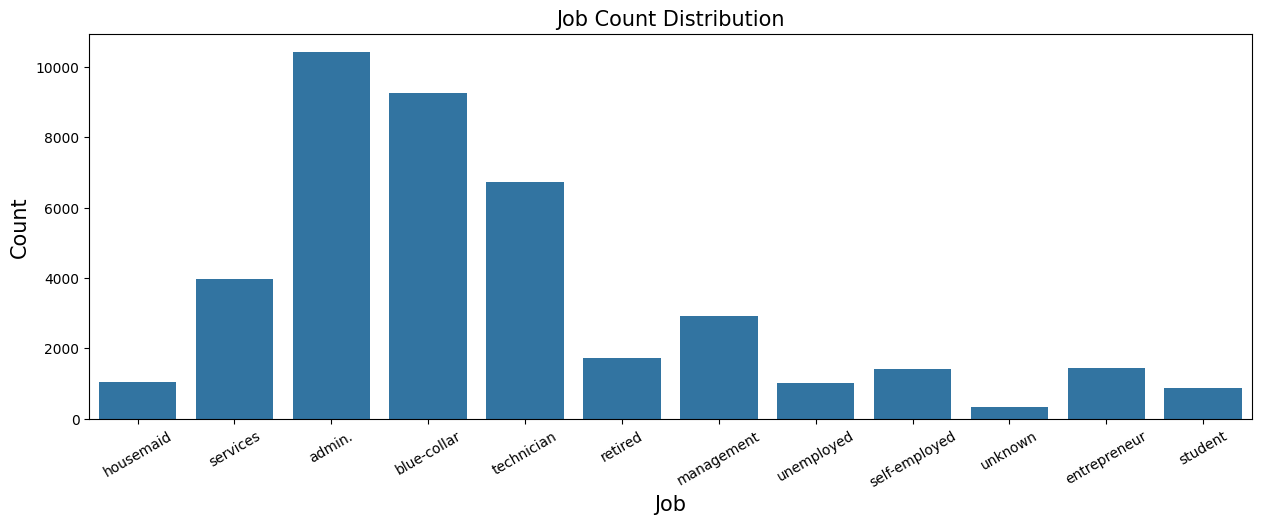

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.countplot(x='job', data=df[cat_col])
plt.xlabel('Job', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Job Count Distribution', fontsize=15)
plt.xticks(rotation=30)
plt.show()

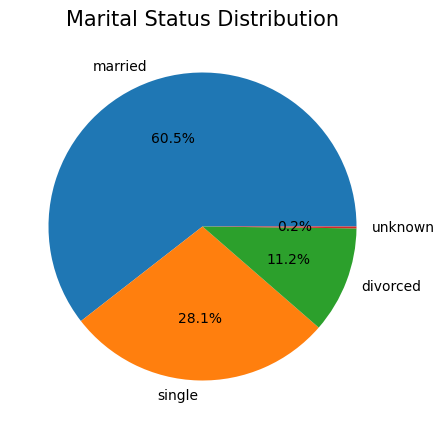

In [92]:
# Plot the pie chart for the 'marital' column
plt.figure(figsize=(10, 5))
df['marital'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Marital Status Distribution', fontsize=15)
plt.ylabel('')
plt.show()

<Figure size 1500x500 with 0 Axes>

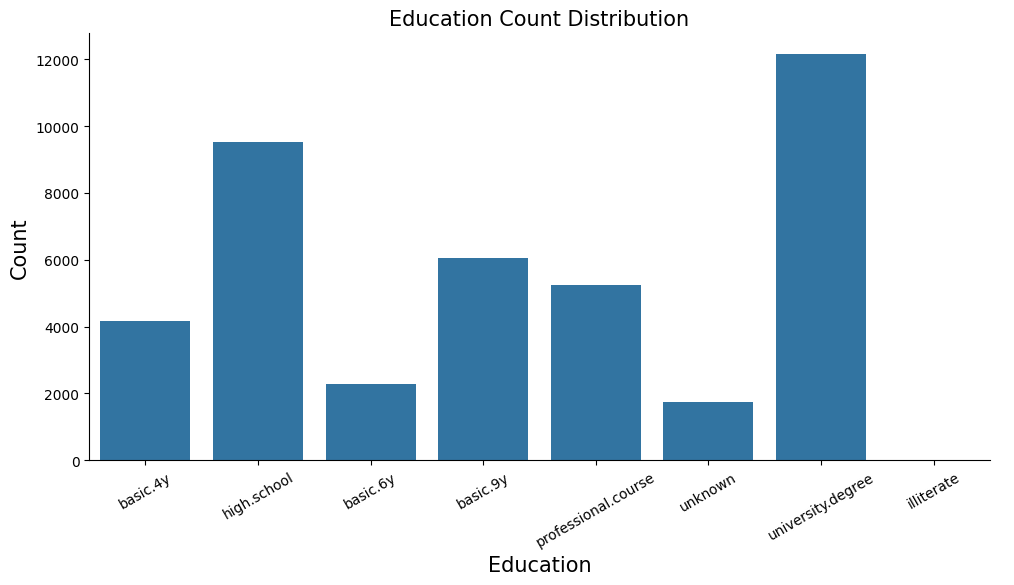

In [93]:
plt.figure(figsize=(15, 5))
sns.catplot(x='education', data=df, kind='count', aspect=2)
plt.xlabel('Education', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Education Count Distribution', fontsize=15)
plt.xticks(rotation=30)
plt.show()

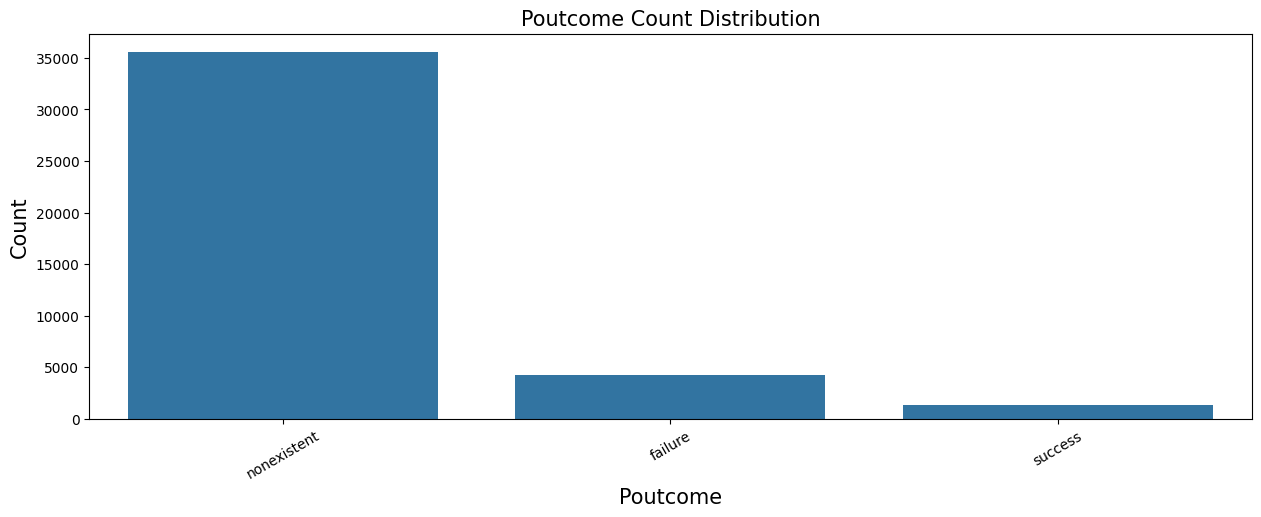

In [94]:
plt.figure(figsize=(15, 5))
sns.countplot(x='poutcome', data=df)
plt.xlabel('Poutcome', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Poutcome Count Distribution', fontsize=15)
plt.xticks(rotation=30)
plt.show()

<Figure size 640x480 with 0 Axes>

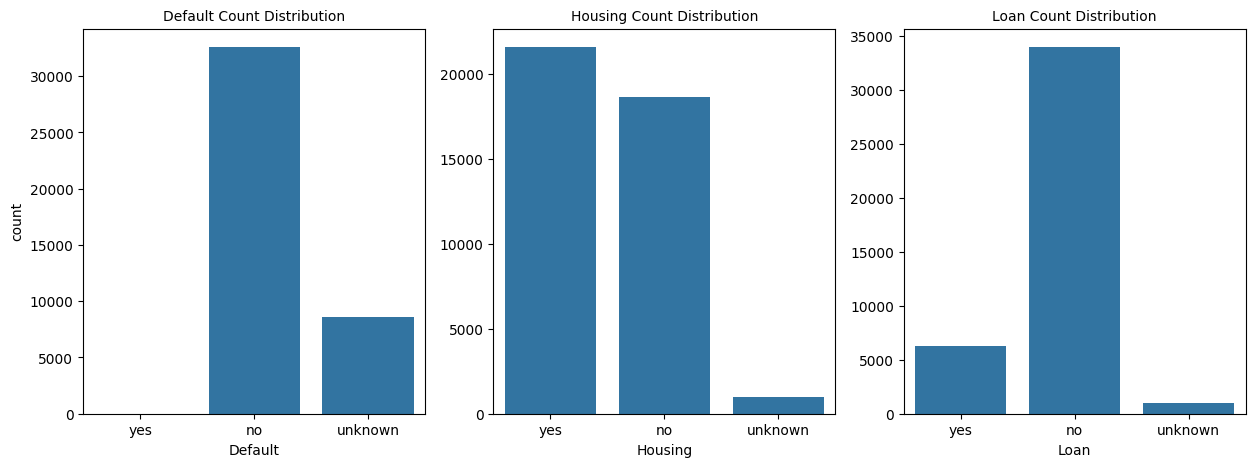

In [95]:
# Add space between the figures
plt.subplots_adjust(wspace=1)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='default', data=df[cat_col], ax=ax1, order=['yes', 'no', 'unknown'])
ax1.set_xlabel('Default', fontsize=10)
ax1.set_title('Default Count Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.countplot(x='housing', data=df[cat_col], ax=ax2, order=['yes', 'no', 'unknown'])
ax2.set_xlabel('Housing', fontsize=10)
ax2.set_ylabel('', fontsize=10)
ax2.set_title('Housing Count Distribution', fontsize=10)
ax2.tick_params(labelsize=10)

sns.countplot(x='loan', data=df[cat_col], ax=ax3, order=['yes', 'no', 'unknown'])
ax3.set_xlabel('Loan', fontsize=10)
ax3.set_ylabel('', fontsize=10)
ax3.set_title('Loan Count Distribution', fontsize=10)
ax3.tick_params(labelsize=10)

plt.show()

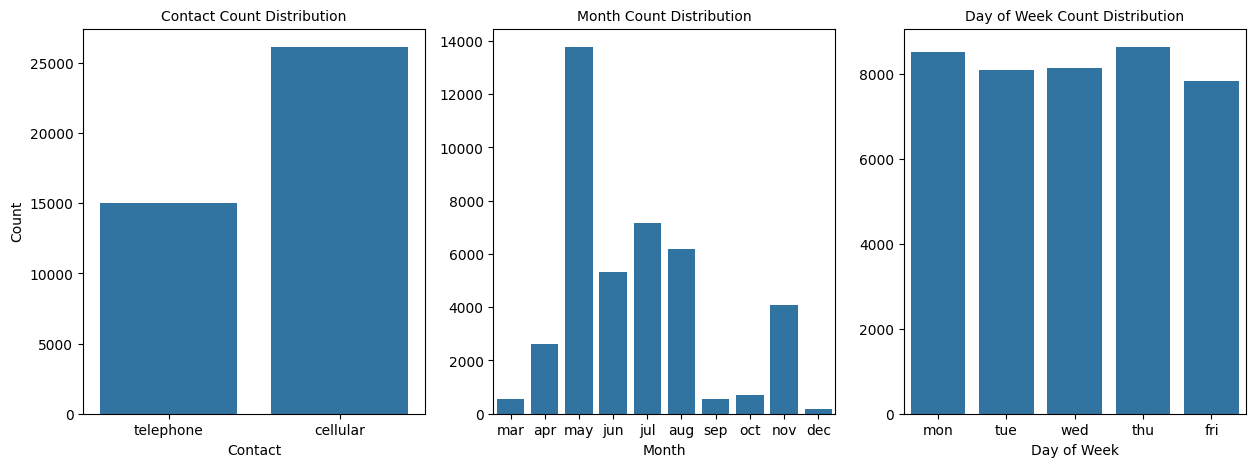

In [96]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='contact', data=df[cat_col], ax=ax1)
ax1.set_xlabel('Contact', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_title('Contact Count Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.countplot(x='month', data=df[cat_col], ax=ax2, order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Month', fontsize=10)
ax2.set_ylabel('', fontsize=10)
ax2.set_title('Month Count Distribution', fontsize=10)
ax2.tick_params(labelsize=10)

sns.countplot(x='day_of_week', data=df[cat_col], ax=ax3)
ax3.set_xlabel('Day of Week', fontsize=10)
ax3.set_ylabel('', fontsize=10)
ax3.set_title('Day of Week Count Distribution', fontsize=10)
ax3.tick_params(labelsize=10)

plt.show()

Adding the encoded categorical features to the dataset.

In [97]:
df = pd.concat([df, new_cat_col], axis=1)
all_cat_col = list(new_cat_col.columns)
df[all_cat_col].head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


Summary of Feature Engineering:

In [100]:
print("Total Number of features: ", len(all_cat_col) + len(num_col))
print("Number of categorical features: ", len(all_cat_col))
print("Number of numerical features: ", len(num_col))

Total Number of features:  62
Number of categorical features:  53
Number of numerical features:  9


Checking for missing values in the new dataset.

In [104]:
df[num_col.to_list() + all_cat_col].isnull().sum().sort_values(ascending=False)

age                     0
campaign                0
pdays                   0
previous                0
emp.var.rate            0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 62, dtype: int64

In [106]:
input_cols = num_col.tolist() + all_cat_col
new_df = df[input_cols + ['Y_LABEL']]

In [107]:
input_cols

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',

In [108]:
len(input_cols)

62

In [109]:
new_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Y_LABEL
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
